## Sentiment Data Analysis

### General Exploratory Data Analysis (EDA)

Summary Statistics:
                  joy   anticipation        disgust        sadness  \
count  146978.000000  146978.000000  146978.000000  146978.000000   
mean        0.312979       0.252025       0.391336       0.226230   
std         0.342631       0.214888       0.341137       0.251104   
min         0.003707       0.016804       0.005220       0.005461   
25%         0.036793       0.069613       0.069598       0.050383   
50%         0.132760       0.184274       0.271714       0.123783   
75%         0.570844       0.385365       0.740396       0.297884   
max         0.993437       0.925072       0.976120       0.985734   

               anger       optimism       surprise      pessimism  \
count  146978.000000  146978.000000  146978.000000  146978.000000   
mean        0.368714       0.182282       0.085980       0.079969   
std         0.368440       0.247521       0.091725       0.100801   
min         0.002678       0.003280       0.004478       0.004884   
25%         

<Figure size 1200x800 with 0 Axes>

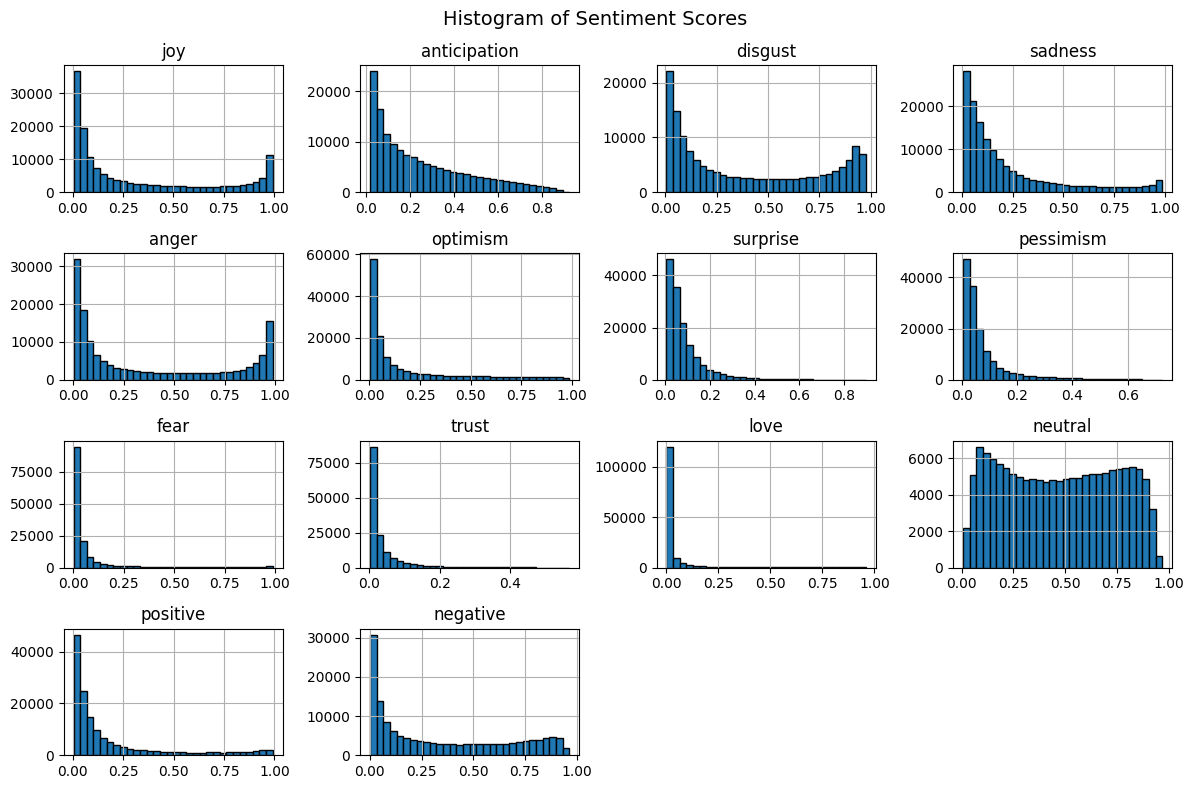

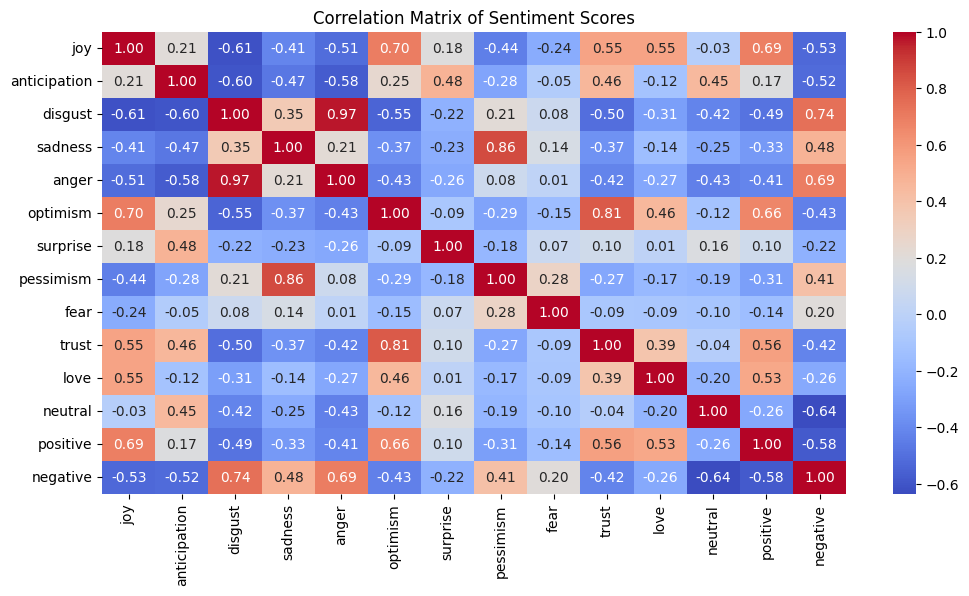

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Reddit_LocalContext.csv")

sentiment_cols = df.columns[5:5+14]  

### 1. Summary Statistics ###
summary_stats = df[sentiment_cols].describe()
print("Summary Statistics:\n", summary_stats)

### 2. Distribution Plots ###
plt.figure(figsize=(12, 8))
df[sentiment_cols].hist(bins=30, figsize=(12, 8), layout=(4, 4), edgecolor='black')
plt.suptitle("Histogram of Sentiment Scores", fontsize=14)
plt.tight_layout()
plt.show()

### 3. Correlation Matrix ###
plt.figure(figsize=(12, 6))
sns.heatmap(df[sentiment_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Sentiment Scores")
plt.show()



/tmp/ipykernel_180821/2162680445.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="dominant_emotion", data=df, palette="coolwarm")


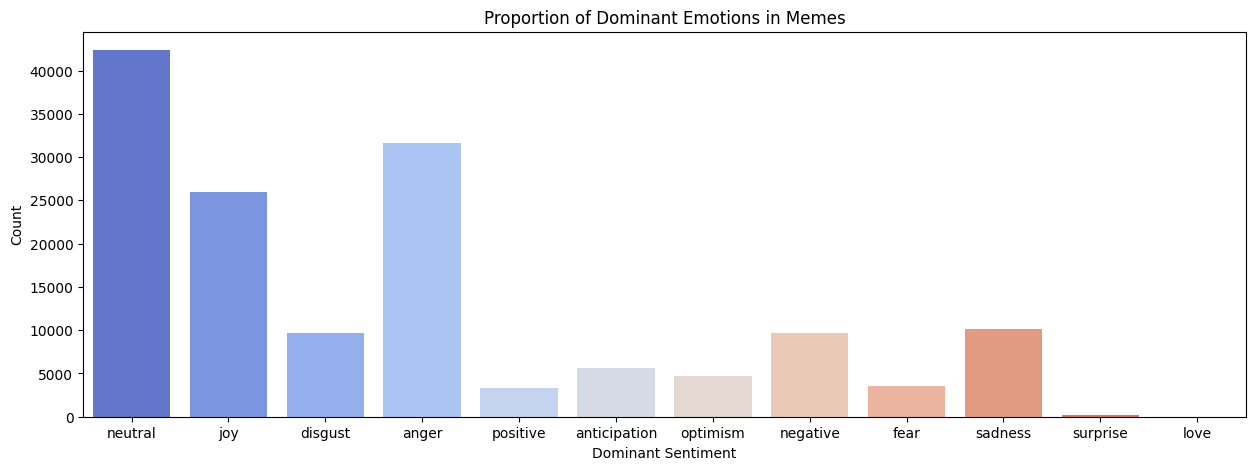

In [2]:
### 4. Sentiment Proportions ###
df["dominant_emotion"] = df[sentiment_cols].idxmax(axis=1)

plt.figure(figsize=(15, 5))
sns.countplot(x="dominant_emotion", data=df, palette="coolwarm")
plt.title("Proportion of Dominant Emotions in Memes")
plt.xlabel("Dominant Sentiment")
plt.ylabel("Count")
plt.show()

/tmp/ipykernel_180821/3453131324.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_proportions.index, y=sentiment_proportions.values, palette="coolwarm")


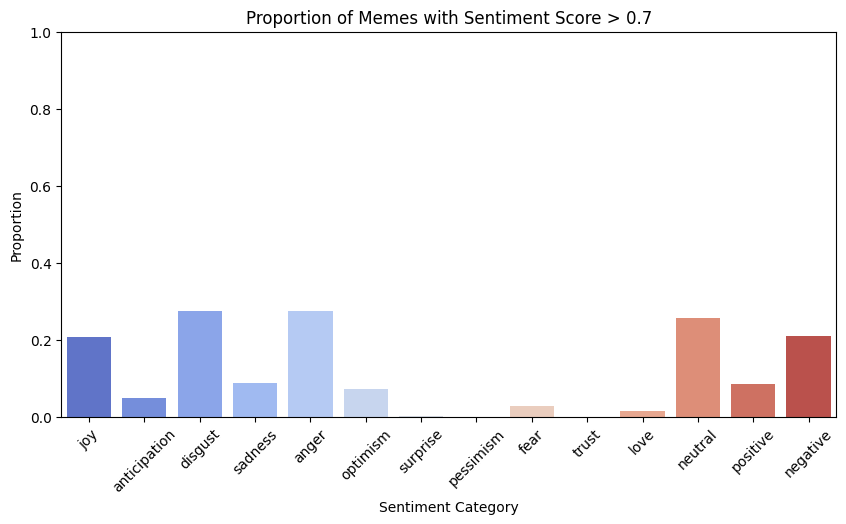

Surprise memes: 198
Pessimism memes: 2
Trust memes: 0


In [3]:
sentiment_proportions = (df[sentiment_cols] > 0.7).mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=sentiment_proportions.index, y=sentiment_proportions.values, palette="coolwarm")

plt.title("Proportion of Memes with Sentiment Score > 0.7")
plt.xlabel("Sentiment Category")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.ylim(0, 1) 
plt.show()

#check how many surprise, pessimism, and trust memes are there
surprise_count = (df["surprise"] > 0.7).sum()
pessimism_count = (df["pessimism"] > 0.7).sum()
trust_count = (df["trust"] > 0.7).sum()
print(f"Surprise memes: {surprise_count}")
print(f"Pessimism memes: {pessimism_count}")
print(f"Trust memes: {trust_count}")

## Sentiment Trends and Patterns

In [4]:
most_emotional_memes = df[sentiment_cols].idxmax()
least_emotional_memes = df[sentiment_cols].idxmin()

most_emotional_filenames = df.loc[most_emotional_memes, "Filename"]
least_emotional_filenames = df.loc[least_emotional_memes, "Filename"]

most_emotional_df = pd.DataFrame({"Sentiment": sentiment_cols, "Most Emotional Meme": most_emotional_filenames.values})
least_emotional_df = pd.DataFrame({"Sentiment": sentiment_cols, "Least Emotional Meme": least_emotional_filenames.values})

print("Most Emotional Memes by Sentiment:")
print(most_emotional_df)
print("\nLeast Emotional Memes by Sentiment:")
print(least_emotional_df)

Most Emotional Memes by Sentiment:
       Sentiment           Most Emotional Meme
0            joy    meme_submissions_63880.jpg
1   anticipation  meme_submissions_1438455.jpg
2        disgust  meme_submissions_1461767.jpg
3        sadness    meme_submissions_56092.jpg
4          anger  meme_submissions_1389251.jpg
5       optimism  meme_submissions_1456440.jpg
6       surprise  meme_submissions_1440308.jpg
7      pessimism  meme_submissions_1355456.jpg
8           fear  meme_submissions_1252208.jpg
9          trust  meme_submissions_1366616.jpg
10          love  meme_submissions_1484891.jpg
11       neutral  meme_submissions_1264012.jpg
12      positive  meme_submissions_1248062.jpg
13      negative  meme_submissions_1387035.jpg

Least Emotional Memes by Sentiment:
       Sentiment          Least Emotional Meme
0            joy  meme_submissions_1204574.jpg
1   anticipation  meme_submissions_1437160.jpg
2        disgust  meme_submissions_1427861.jpg
3        sadness  meme_submissions_

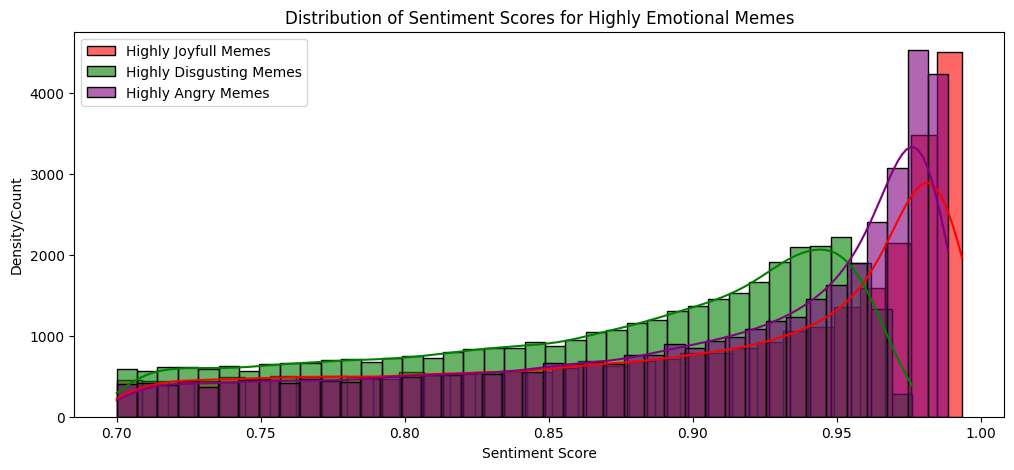

In [5]:
high_joy = df[df["joy"] > 0.7]
# high_neutral = df[df["neutral"] > 0.7]
high_disgust = df[df["disgust"] > 0.7]
high_anger = df[df["anger"] > 0.7]
# high_sadness = df[df["sadness"] > 0.7]
# high_anticipation = df[df["anticipation"] > 0.7]
# high_negative = df[df["negative"] > 0.7]
# high_positive = df[df["positive"] > 0.7]
# high_fear = df[df["fear"] > 0.7]
# high_love = df[df["love"] > 0.7]
# high_optimism = df[df["optimism"] > 0.7]
# high_surprise = df[df["surprise"] > 0.7]
# high_pessimism = df[df["pessimism"] > 0.7]

plt.figure(figsize=(12, 5))

sns.histplot(high_joy['joy'], label="Highly Joyfull Memes", color="red", alpha=0.6, kde=True)
# sns.histplot(high_neutral['neutral'], label="Highly Neutral Memes", color="blue", alpha=0.6, kde=True)
sns.histplot(high_disgust['disgust'], label="Highly Disgusting Memes", color="green", alpha=0.6, kde=True)
sns.histplot(high_anger['anger'], label="Highly Angry Memes", color="purple", alpha=0.6, kde=True)
# sns.histplot(high_sadness['sadness'], label="Highly Sad Memes", color="orange", alpha=0.6, kde=True)
# sns.histplot(high_anticipation['anticipation'], label="Highly Anticipated Memes", color="pink", alpha=0.6, kde=True)
# sns.histplot(high_negative['negative'], label="Highly Negative Memes", color="brown", alpha=0.6, kde=True)
# sns.histplot(high_positive['positive'], label="Highly Positive Memes", color="yellow", alpha=0.6, kde=True)
# sns.histplot(high_fear['fear'], label="Highly Fearful Memes", color="gray", alpha=0.6, kde=True)
# sns.histplot(high_love['love'], label="Highly Loving Memes", color="teal", alpha=0.6, kde=True)
# sns.histplot(high_optimism['optimism'], label="Highly Optimistic Memes", color="magenta", alpha=0.6, kde=True)

# sns.histplot(high_pessimism['pessimism'], label="Highly Pessimistic Memes", color="violet", alpha=0.6, kde=True)
# sns.histplot(high_surprise['surprise'], label="Highly Surprising Memes", color="cyan", alpha=0.6, kde=True)


plt.title("Distribution of Sentiment Scores for Highly Emotional Memes")
plt.xlabel("Sentiment Score")
plt.ylabel("Density/Count")
plt.legend()
plt.show()

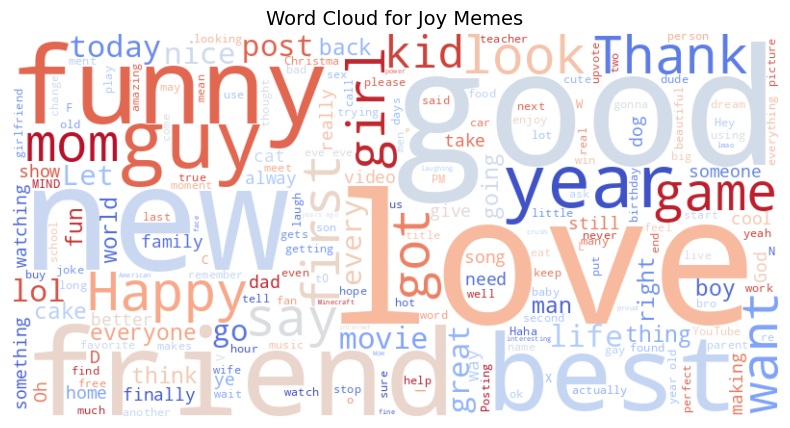

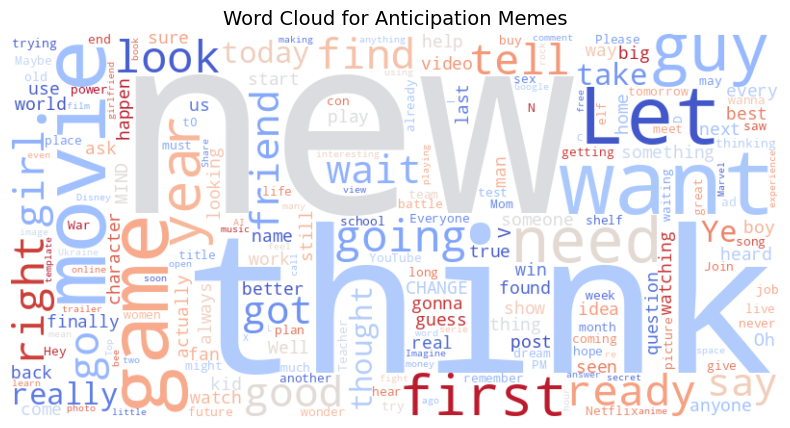

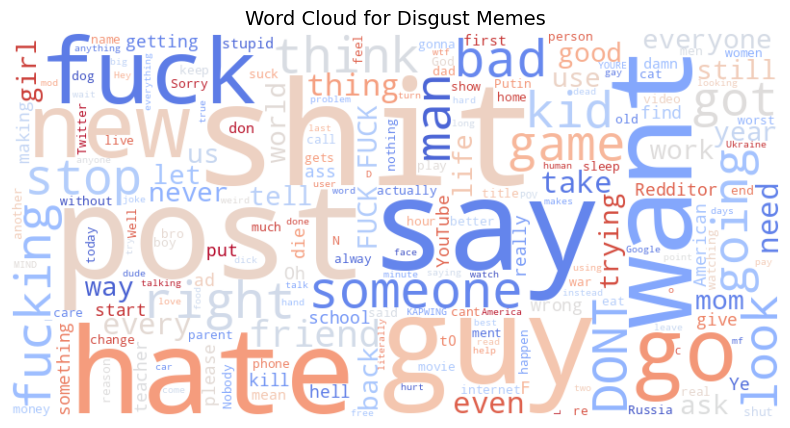

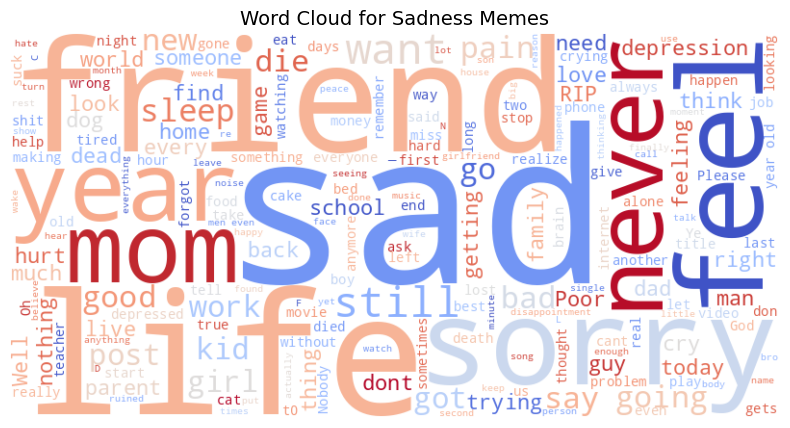

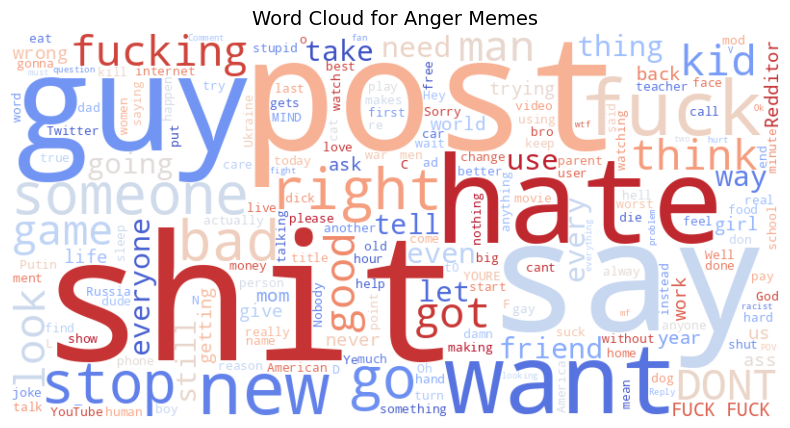

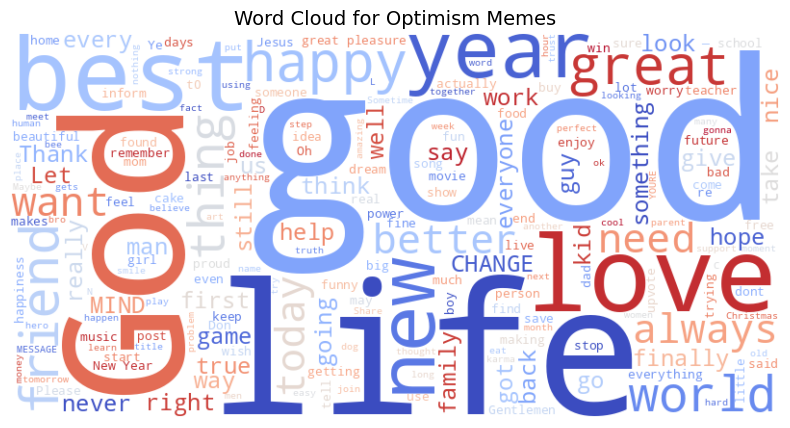

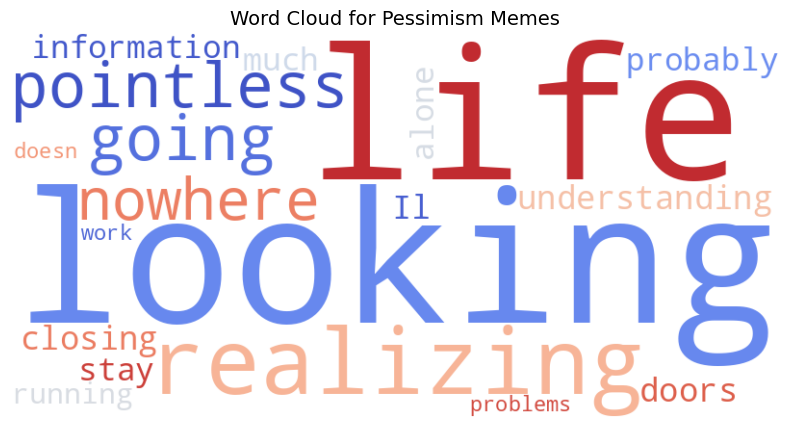

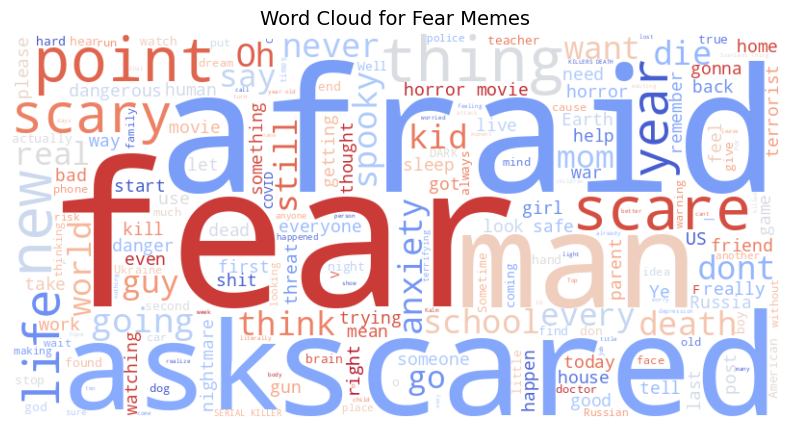

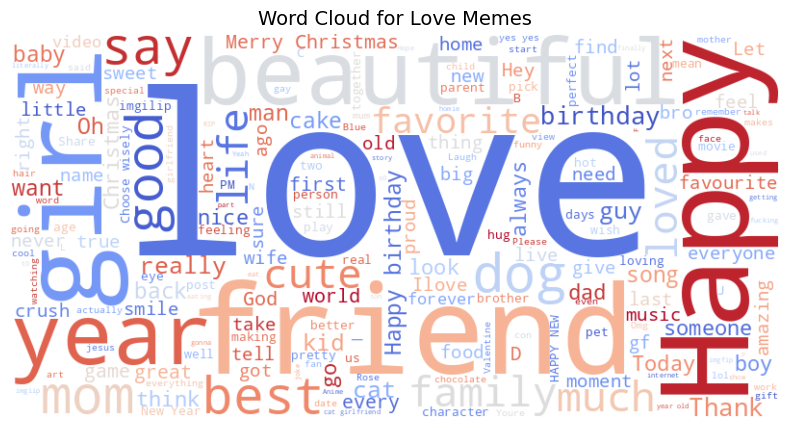

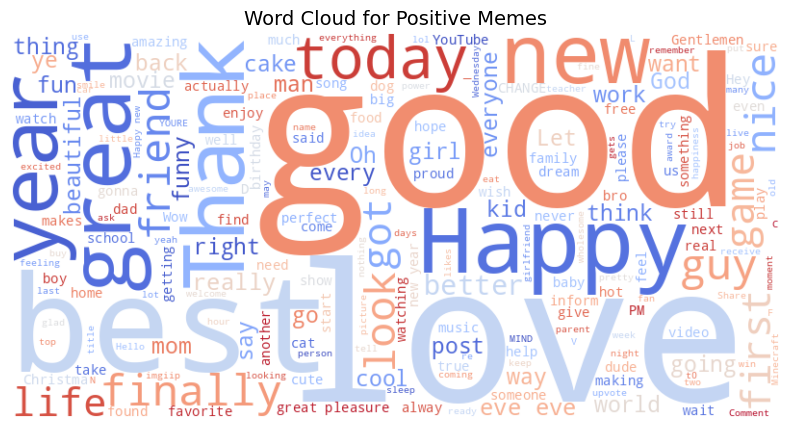

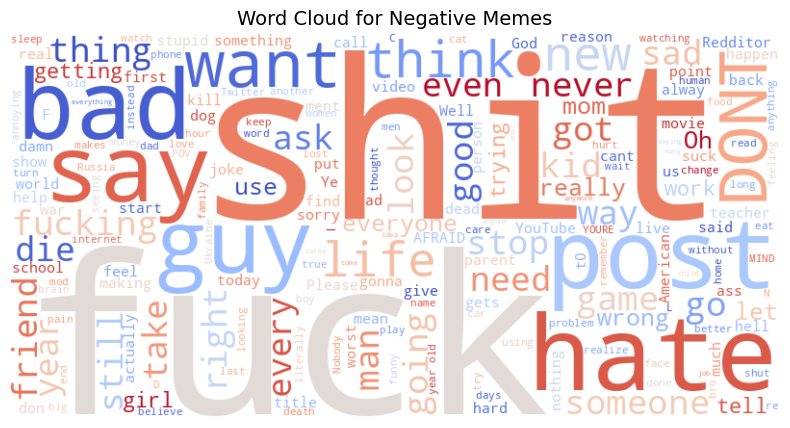

In [6]:
from wordcloud import WordCloud, STOPWORDS

threshold = 0.7  # Threshold for high-scoring memes
custom_stopwords = STOPWORDS.union({"T","meme","memes", "people","Reddit","make","made","S","one","know","day","time","now","u","will","see","Im","m","e"})

def plot_wordcloud(text, title, color="black"):
    wordcloud = WordCloud(stopwords=custom_stopwords,
    width=800, 
    height=400, 
    background_color=color, 
    colormap="coolwarm").generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

for sentiment in sentiment_cols:
    high_scoring_memes = df[df[sentiment] > threshold]["Extracted Text + Title"]
    if not high_scoring_memes.empty:
        plot_wordcloud(high_scoring_memes, f"Word Cloud for {sentiment.capitalize()} Memes", color="white")

## Sentiments vs Date Created

Joy and Neutral are highly domminant, we will put them in one group.
Anticipation & Disgust is the next group.
All other sentiments.

In [7]:
# import pandas as pd

# df_og = pd.read_parquet(r"/home/hsdslab/Documents/Meme_project_TriAn/Reddit2024_nolabel/subreddits23/meme_submissions.zst.parquet")
# df_filename = pd.read_csv("sentiment_analysis_scores.csv")

# df_filename['id'] = df_filename['Filename'].str.replace(r'\.jpg|\.png', '', regex=True)
# withDate = pd.merge(df_filename,df_og[['id','created_utc']],on='id',how='left')
# withDate.to_csv("createdTime.csv",index=False)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df_withDate = pd.read_csv("Reddit_LocalContext.csv")

df_withDate['Date'] = pd.to_datetime(df_withDate['created_utc'])
df_withDate['Month'] = df_withDate['Date'].dt.to_period('M') 


threshold = 0.7

#total memes uploaded per month
meme_counts = df_withDate.groupby('Month').agg(
    total_memes=('Filename', 'size')
)

sentiment_counts = df_withDate.groupby('Month').agg(
    joyfull_memes=('joy', lambda x: (x > threshold).sum()),
    neutral_memes=('neutral', lambda x: (x > threshold).sum()),
    anticipation_memes=('anticipation', lambda x: (x > threshold).sum()),
    disgust_memes=('disgust', lambda x: (x > threshold).sum()),
    sad_memes=('sadness', lambda x: (x > threshold).sum()),
    anger_memes=('anger', lambda x: (x > threshold).sum()),
    # surprise_memes=('surprise', lambda x: (x > threshold).sum()),
    negative_memes=('negative', lambda x: (x > threshold).sum()),
    positive_memes=('positive', lambda x: (x > threshold).sum()),
    fear_memes=('fear', lambda x: (x > threshold).sum()),
    # pessimism_memes=('pessimism', lambda x: (x > threshold).sum()),
    love_memes=('love', lambda x: (x > threshold).sum()),
    optimism_memes=('optimism', lambda x: (x > threshold).sum()),
)

normalized_sentiment_counts = sentiment_counts.div(meme_counts['total_memes'], axis=0)

plt.figure(figsize=(20, 6))
plt.plot(normalized_sentiment_counts.index.astype(str), normalized_sentiment_counts["joyfull_memes"], marker='o', label="Normalized Joyfull Memes", color="red")
plt.plot(normalized_sentiment_counts.index.astype(str), normalized_sentiment_counts["neutral_memes"], marker='s', label="Normalized Neutral Memes", color="blue")
plt.plot(normalized_sentiment_counts.index.astype(str), normalized_sentiment_counts["anticipation_memes"], marker='v', label="Normalized Anticipation Memes", color="green")
plt.plot(normalized_sentiment_counts.index.astype(str), normalized_sentiment_counts["disgust_memes"], marker='P', label="Normalized Disgust Memes", color="brown")
plt.plot(normalized_sentiment_counts.index.astype(str), normalized_sentiment_counts["sad_memes"], marker='D', label="Normalized Sad Memes", color="orange")
plt.plot(normalized_sentiment_counts.index.astype(str), normalized_sentiment_counts["anger_memes"], marker='X', label="Normalized Angry Memes", color="purple")
# plt.plot(normalized_sentiment_counts.index.astype(str), normalized_sentiment_counts["surprise_memes"], marker='*', label="Normalized Surprising Memes", color="cyan")
plt.plot(normalized_sentiment_counts.index.astype(str), normalized_sentiment_counts["negative_memes"], marker='h', label="Normalized Negative Memes", color="brown")
plt.plot(normalized_sentiment_counts.index.astype(str), normalized_sentiment_counts["positive_memes"], marker='H', label="Normalized Positive Memes", color="cyan")
plt.plot(normalized_sentiment_counts.index.astype(str), normalized_sentiment_counts["fear_memes"], marker='1', label="Normalized Fearful Memes", color="gray")
# plt.plot(normalized_sentiment_counts.index.astype(str), normalized_sentiment_counts["pessimism_memes"], marker='|', label="Normalized Pessimistic Memes", color="violet")
plt.plot(normalized_sentiment_counts.index.astype(str), normalized_sentiment_counts["love_memes"], marker='>', label="Normalized Loving Memes", color="teal")
plt.plot(normalized_sentiment_counts.index.astype(str), normalized_sentiment_counts["optimism_memes"], marker='<', label="Normalized Optimistic Memes", color="magenta")

plt.xlabel("Time")
plt.ylabel("Normalized Number of Memes (Per Month)")
plt.title("Normalized Number of Memes Over Time")

tick_positions = range(0, len(normalized_sentiment_counts), 3)
tick_labels = normalized_sentiment_counts.index.astype(str)[tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)
plt.legend()
plt.grid(True)
plt.show()

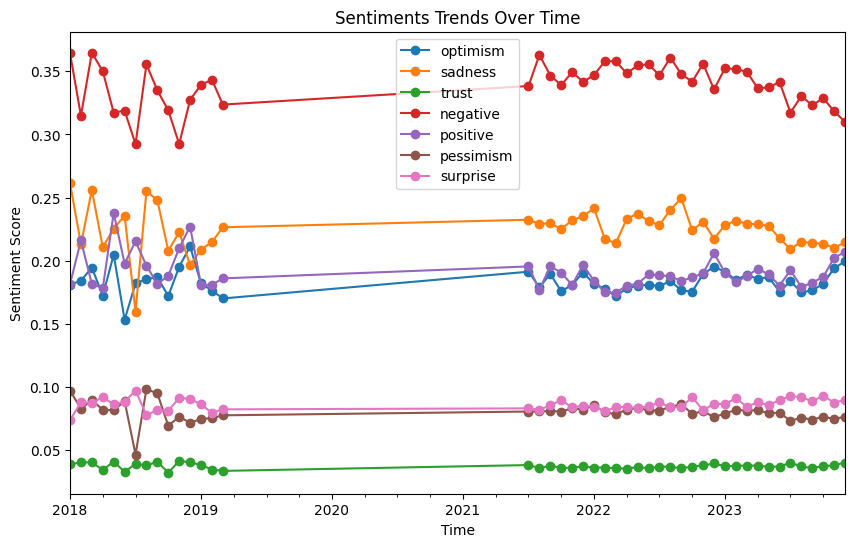

In [9]:
df_withDate = pd.read_csv("Reddit_LocalContext.csv")
df_withDate['Date'] = pd.to_datetime(df_withDate['created_utc'])
df_withDate['Time'] = df_withDate['Date'].dt.to_period('M') 

sentiment_trends1 = df_withDate.groupby('Time')[['joy', 'neutral','anticipation', 'disgust','anger', "fear","love"]].mean()
sentiment_trends1.plot(kind='line', figsize=(10, 6), title="Sentiments Trends Over Time",marker='o')
plt.ylabel('Sentiment Score')
# plt.show()

sentiment_trends2 = df_withDate.groupby('Time')[["optimism","sadness","trust","negative","positive",'pessimism','surprise']].mean()
sentiment_trends2.plot(kind='line', figsize=(10, 6), title="Sentiments Trends Over Time",marker='o')
plt.ylabel('Sentiment Score')
plt.show()


## Sentiments vs Upvotes

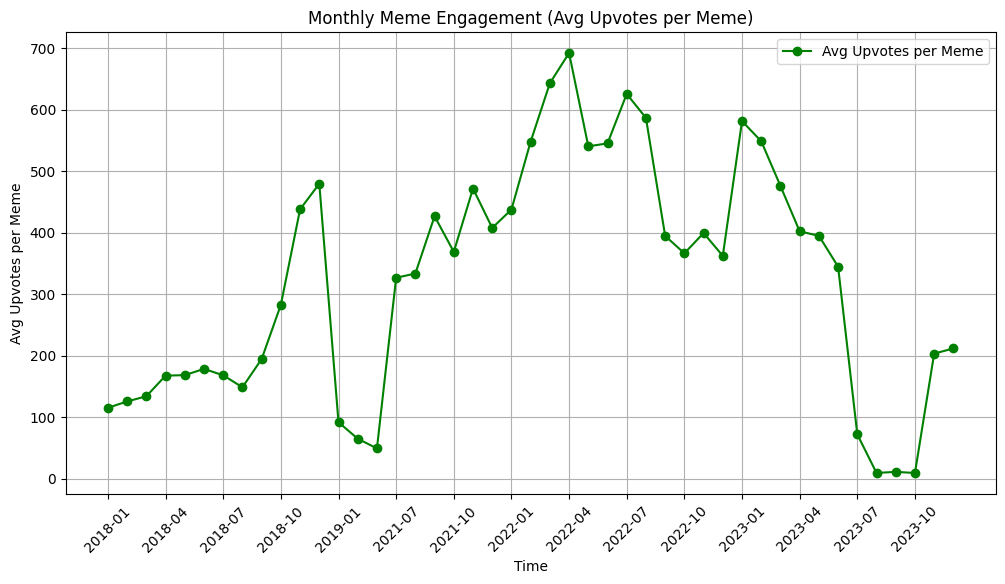

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Reddit_LocalContext.csv")
df["Date"] = pd.to_datetime(df["created_utc"])
df["Month"] = df["Date"].dt.to_period("M") 
monthly_engagement = df.groupby('Month').agg(
    total_upvotes=('score', 'sum'),
    total_memes=('score', 'size')
).reset_index()

# Calculate average upvotes per meme (normalize engagement)
monthly_engagement['avg_upvotes_per_meme'] = monthly_engagement['total_upvotes'] / monthly_engagement['total_memes']

# Plot the trend of total upvotes over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_engagement['Month'].astype(str), monthly_engagement['total_upvotes'], marker='o', color='blue', label='Total Upvotes')
plt.title("Monthly Meme Engagement (Total Upvotes)")
plt.xlabel("Time")
plt.ylabel("Total Upvotes")
tick_positions = range(0, len(normalized_sentiment_counts), 3)
tick_labels = normalized_sentiment_counts.index.astype(str)[tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plot the trend of average upvotes per meme over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_engagement['Month'].astype(str), monthly_engagement['avg_upvotes_per_meme'], marker='o', color='green', label='Avg Upvotes per Meme')
plt.title("Monthly Meme Engagement (Avg Upvotes per Meme)")
plt.xlabel("Time")
plt.ylabel("Avg Upvotes per Meme")
tick_positions = range(0, len(normalized_sentiment_counts), 3)
tick_labels = normalized_sentiment_counts.index.astype(str)[tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)
plt.grid(True)
plt.legend()
plt.show()

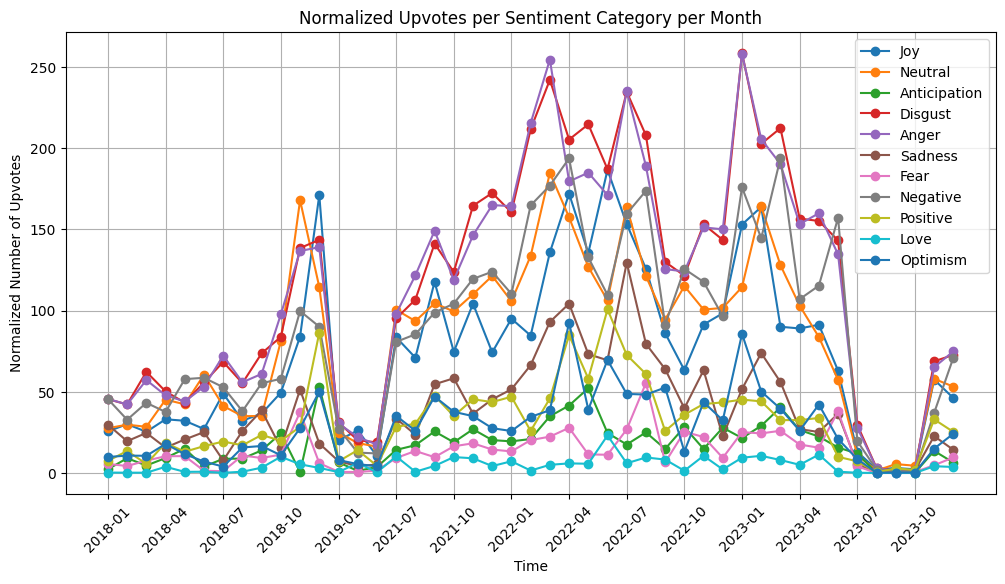

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Reddit_LocalContext.csv")
threshold = 0.7
df_filtered = df[
    (df["joy"] > threshold) |
    (df["neutral"] > threshold) |
    (df["anticipation"] > threshold) |
    (df["disgust"] > threshold) |
    (df["anger"] > threshold) |
    (df["sadness"] > threshold) |
    # (df["surprise"] > threshold) |
    (df["fear"] > threshold) |
    (df["negative"] > threshold) |
    (df["positive"] > threshold) |
    # (df["pessimism"] > threshold) |
    (df["love"] > threshold) |
    (df["optimism"] > threshold)
].copy()

df_filtered["Date"] = pd.to_datetime(df_filtered["created_utc"]) 
df_filtered["Month"] = df_filtered["Date"].dt.to_period("M")

monthly_engagement = df_filtered.groupby('Month').agg(
    joy_upvotes=('score', lambda x: x[df_filtered["joy"] > threshold].sum()/len(x)),
    neutral_upvotes=('score', lambda x: x[df_filtered["neutral"] > threshold].sum()/len(x)),
    anticipation_upvotes=('score', lambda x: x[df_filtered["anticipation"] > threshold].sum()/len(x)),
    disgust_upvotes=('score', lambda x: x[df_filtered["disgust"] > threshold].sum()/len(x)),
    anger_upvotes=('score', lambda x: x[df_filtered["anger"] > threshold].sum()/len(x)),
    sadness_upvotes=('score', lambda x: x[df_filtered["sadness"] > threshold].sum()/len(x)),
    # surprise_upvotes=('score', lambda x: x[df_filtered["surprise"] > threshold].sum()/len(x)),
    fear_upvotes=('score', lambda x: x[df_filtered["fear"] > threshold].sum()/len(x)),
    negative_upvotes=('score', lambda x: x[df_filtered["negative"] > threshold].sum()/len(x)),
    positive_upvotes=('score', lambda x: x[df_filtered["positive"] > threshold].sum()/len(x)),
    # pessimism_upvotes=('score', lambda x: x[df_filtered["pessimism"] > threshold].sum()/len(x)),
    love_upvotes=('score', lambda x: x[df_filtered["love"] > threshold].sum()/len(x)),
    optimism_upvotes=('score', lambda x: x[df_filtered["optimism"] > threshold].sum()/len(x)),
).reset_index()

sentiment_categories = ["joy", "neutral", "anticipation", "disgust", "anger", "sadness", "fear", "negative", "positive", "love", "optimism"]

plt.figure(figsize=(12, 6))
for sentiment in sentiment_categories:
    plt.plot(monthly_engagement['Month'].astype(str), 
             monthly_engagement[f'{sentiment}_upvotes'], 
             marker='o', label=sentiment.capitalize())

plt.title("Normalized Upvotes per Sentiment Category per Month")
plt.xlabel("Time")
plt.ylabel("Normalized Number of Upvotes")
tick_positions = range(0, len(monthly_engagement), 3)
tick_labels = monthly_engagement['Month'].astype(str)[tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)
plt.grid(True)
plt.legend()
plt.show()

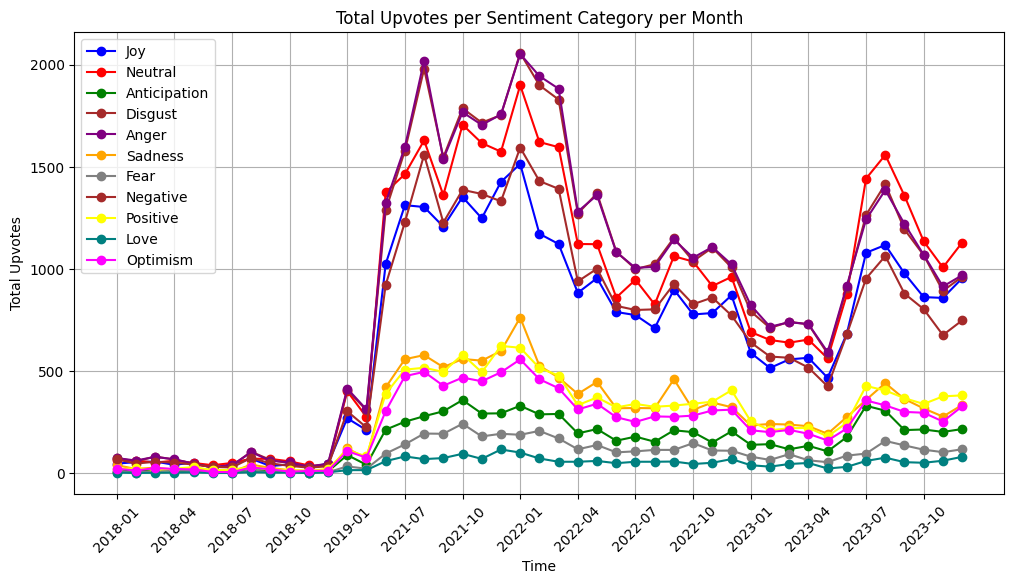

In [13]:
# total upvotes per sentiment category
monthly_engagement = df_filtered.groupby('Month').agg(
    total_joy_upvotes=('joy', lambda x: (x > 0.7).sum()),
    total_neutral_upvotes=('neutral', lambda x: (x > 0.7).sum()),
    total_anticipation_upvotes=('anticipation', lambda x: (x > 0.7).sum()),
    total_disgust_upvotes=('disgust', lambda x: (x > 0.7).sum()),
    total_anger_upvotes=('anger', lambda x: (x > 0.7).sum()),
    total_sadness_upvotes=('sadness', lambda x: (x > 0.7).sum()),
    # total_surprise_upvotes=('surprise', lambda x: (x > 0.7).sum()),
    total_fear_upvotes=('fear', lambda x: (x > 0.7).sum()),
    total_negative_upvotes=('negative', lambda x: (x > 0.7).sum()),
    total_positive_upvotes=('positive', lambda x: (x > 0.7).sum()),
    # total_pessimism_upvotes=('pessimism', lambda x: (x > 0.7).sum()),
    total_love_upvotes=('love', lambda x: (x > 0.7).sum()),
    total_optimism_upvotes=('optimism', lambda x: (x > 0.7).sum())
).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_engagement['Month'].astype(str), monthly_engagement['total_joy_upvotes'], marker='o', color='blue', label='Joy')
plt.plot(monthly_engagement['Month'].astype(str), monthly_engagement['total_neutral_upvotes'], marker='o', color='red', label='Neutral')
plt.plot(monthly_engagement['Month'].astype(str), monthly_engagement['total_anticipation_upvotes'], marker='o', color='green', label='Anticipation')
plt.plot(monthly_engagement['Month'].astype(str), monthly_engagement['total_disgust_upvotes'], marker='o', color='brown', label='Disgust')
plt.plot(monthly_engagement['Month'].astype(str), monthly_engagement['total_anger_upvotes'], marker='o', color='purple', label='Anger')
plt.plot(monthly_engagement['Month'].astype(str), monthly_engagement['total_sadness_upvotes'], marker='o', color='orange', label='Sadness')
# plt.plot(monthly_engagement['Month'].astype(str), monthly_engagement['total_surprise_upvotes'], marker='o', color='cyan', label='Surprise')
plt.plot(monthly_engagement['Month'].astype(str), monthly_engagement['total_fear_upvotes'], marker='o', color='gray', label='Fear')
plt.plot(monthly_engagement['Month'].astype(str), monthly_engagement['total_negative_upvotes'], marker='o', color='brown', label='Negative')
plt.plot(monthly_engagement['Month'].astype(str), monthly_engagement['total_positive_upvotes'], marker='o', color='yellow', label='Positive')
# plt.plot(monthly_engagement['Month'].astype(str), monthly_engagement['total_pessimism_upvotes'], marker='o', color='violet', label='Pessimism')
plt.plot(monthly_engagement['Month'].astype(str), monthly_engagement['total_love_upvotes'], marker='o', color='teal', label='Love')
plt.plot(monthly_engagement['Month'].astype(str), monthly_engagement['total_optimism_upvotes'], marker='o', color='magenta', label='Optimism')

plt.title("Total Upvotes per Sentiment Category per Month")
plt.xlabel("Time")
plt.ylabel("Total Upvotes")
tick_positions = range(0, len(monthly_engagement), 3)
tick_labels = monthly_engagement['Month'].astype(str)[tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# import pandas as pd

# # Load the data
# df = pd.read_csv("cleaned_extracted_texts_final_ver2.csv")

# # Add a new column for text length (assuming 'text' column contains the meme's text)
# df["text_length"] = df["Extracted Text"].apply(lambda x: len(str(x)))

# df_Reddit_LocalContext = pd.read_csv("Reddit_LocalContext.csv")
# df = pd.merge(df_Reddit_LocalContext,df[['Filename','text_length']],on='Filename',how='left')
# df.to_csv("Reddit_LocalContext.csv",index=False)

df = pd.read_csv("Reddit_LocalContext.csv")

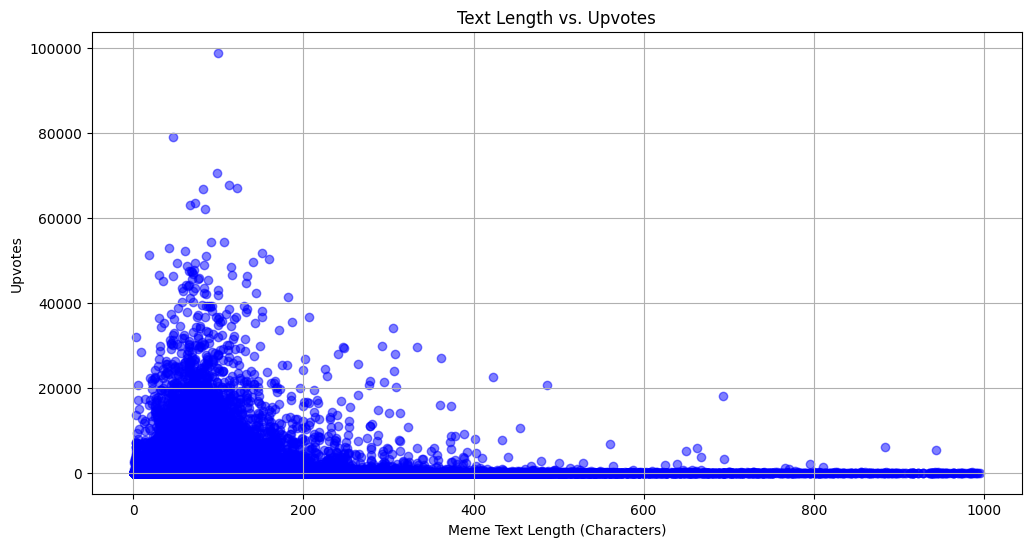

In [15]:
#remove outliers
df = df[df['text_length'] < 1000]

# Plot text length vs. upvotes
plt.figure(figsize=(12, 6))
plt.scatter(df["text_length"], df["score"], alpha=0.5, color='blue')
plt.title("Text Length vs. Upvotes")
plt.xlabel("Meme Text Length (Characters)")
plt.ylabel("Upvotes")
plt.grid(True)
plt.show()